In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
import re
import seaborn as sns

In [2]:
#load data
data = pd.read_csv('fake_transactional_data_24.csv')

/var/folders/bd/lf6gb3192ngddqgzx5zqq1bh0000gn/T/ipykernel_57857/3086509985.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='to_randomly_generated_account', y='monopoly_money_amount', data=sampled_data, palette='viridis', alpha=0.6)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


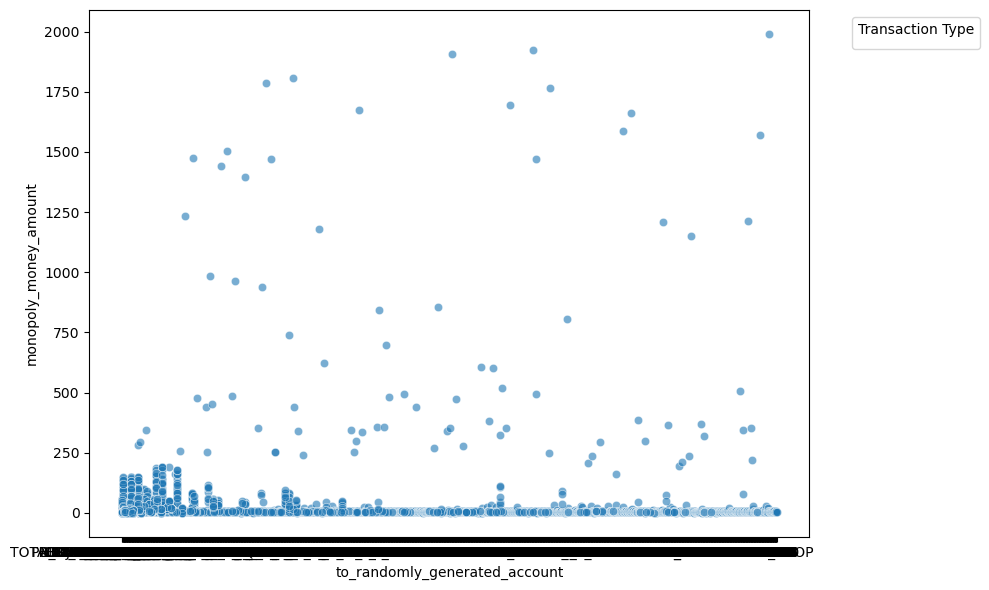

In [4]:
sampled_data = data.sample(n=10000, random_state=42)  


plt.figure(figsize=(10, 6))
sns.scatterplot(x='to_randomly_generated_account', y='monopoly_money_amount', data=sampled_data, palette='viridis', alpha=0.6)
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
def replace_account_names(name):
    if re.fullmatch(r'\d+', name):
        return 'transaction'

    else:
        return name

In [16]:


data['to_randomly_generated_account'] = data['to_randomly_generated_account'].apply(lambda x: replace_account_names(x))
# random sample
sampled_data = data.sample(frac=0.1, random_state=42)  # 10% data(if not it will stuck)

scaler = StandardScaler()
X_sampled_scaled = scaler.fit_transform(sampled_data[['monopoly_money_amount']])

# Kmeans
kmeans_sampled = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_sampled.fit(X_sampled_scaled)

# labels
sampled_data['cluster'] = kmeans_sampled.labels_






/Users/liubohan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [12]:
wcss = []
for i in range(1, 11):  # k = 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_sampled_scaled)
    wcss.append(kmeans.inertia_)

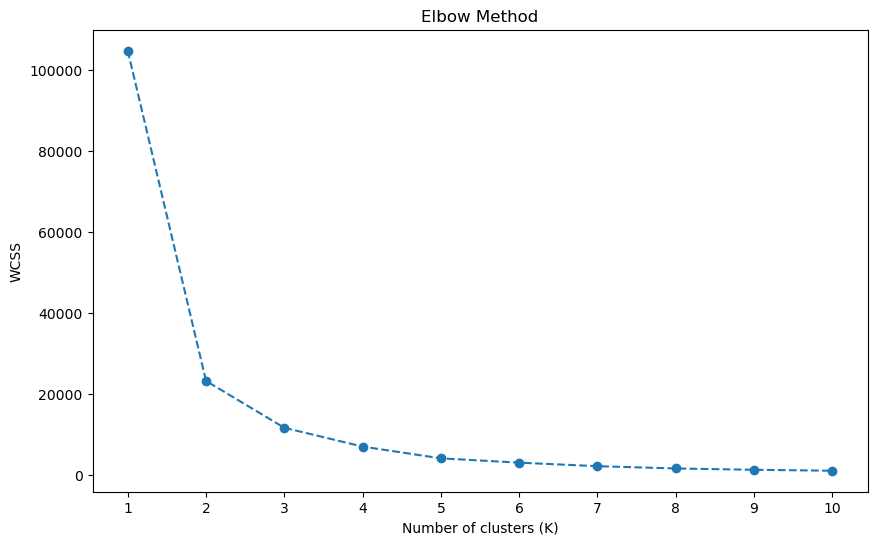

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

1    61273
2    32185
0    11400
Name: cluster, dtype: int64


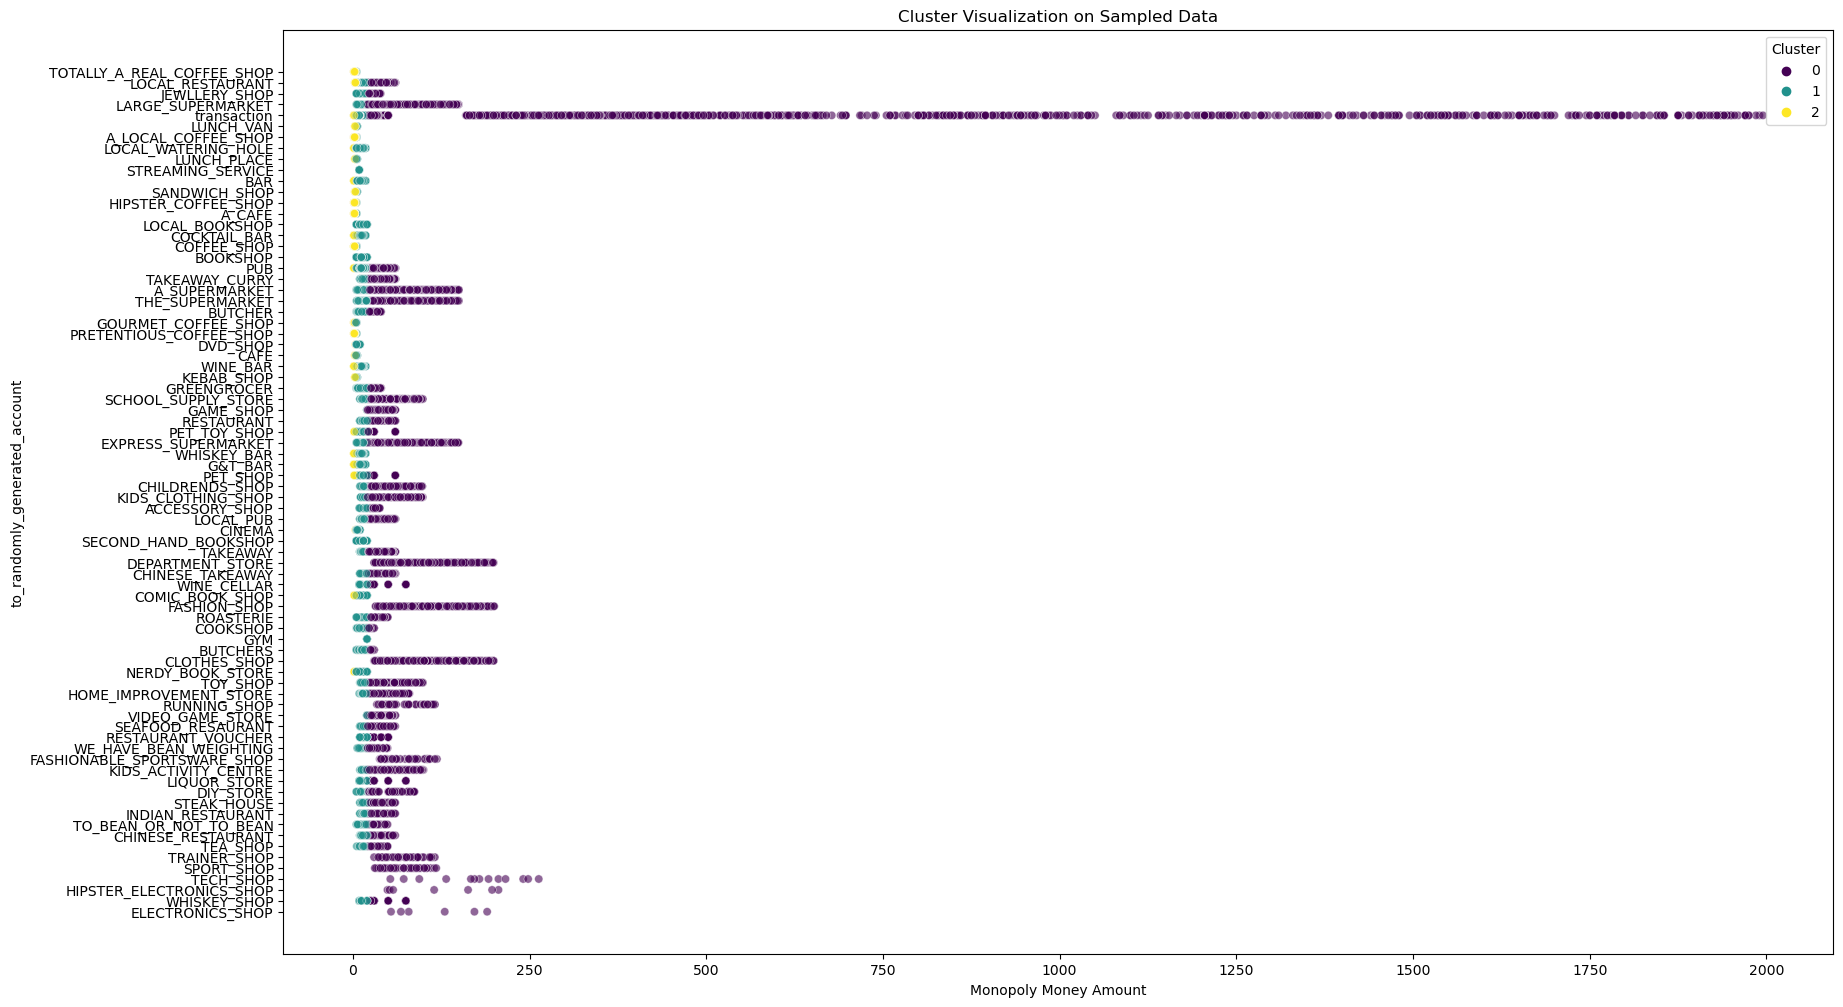

In [17]:

print(sampled_data['cluster'].value_counts())



plt.figure(figsize=(20, 12))
sns.scatterplot(data=sampled_data, x='monopoly_money_amount', y='to_randomly_generated_account', hue='cluster', palette='viridis', alpha=0.6)
plt.title('Cluster Visualization on Sampled Data')
plt.xlabel('Monopoly Money Amount')
plt.ylabel('to_randomly_generated_account')
plt.legend(title='Cluster')
plt.show()
